## Test LT

In [8]:
import language_tool_python
from pprint import pprint

In [3]:
tool = language_tool_python.LanguageTool('en-US')  # use a local server (automatically set up), language English

In [12]:
matches = tool.check("Whoever is happy wil make other persons happy to.")

In [14]:
for match in matches:
    print(match.)
    print("\n")

Offset 17, length 3, Rule ID: MORFOLOGIK_RULE_EN_US
Message: Possible spelling mistake found.
Suggestion: will; win; oil; wild; Will; wit; Gil; Wii; wig; mil; nil; til; wilt; wily; wail; ail; wile; wiz; BIL; CIL; DIL; GIL; IL; PIL; SIL; UIL; WI; WIA; WIC; WIF; WIM; WIP; WIR; WML; WOL; Wis; ZIL; WSL; Wix
Whoever is happy wil make other persons happy to.
                 ^^^




## Test errants

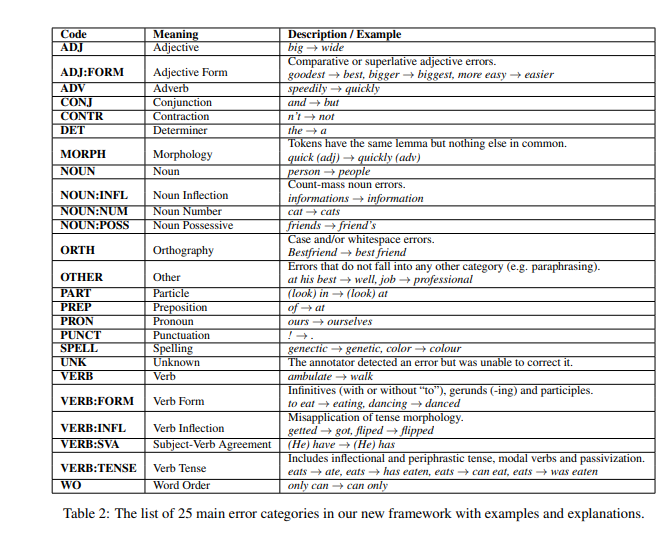

In [16]:
import errant

annotator = errant.load('en')

In [75]:
def compare_LT_errants(src, trg):
    print(f"\nOriginal sentence: {src}")
    
    # LT ANNOTATION
    print("\n\t\033[1mLT annotation and correction\033[0m")
    matches = tool.check(src)
    if not matches:
        print("\tNo match\n")
    for match in matches:
        print(f"\t> {match.matchedText:10} {match.category:<8} {match.message}")
        print("\n")
        
    # ERRANT ANNOTATION
    print("\t\033[1mErrant annotation \033[0m (golden data from gector)")
    src_an = annotator.parse(src)
    trg_an= annotator.parse(trg)
    edits = annotator.annotate(src_an, trg_an)
    for e in edits:
        print(f"\t> {e.o_str:<10} {e.type:<8}")

In [76]:
compare_LT_errants("Chlorine is widly used in the swimming pools market.", "Chlorine is widely used in the swimming pool market.")


Original sentence: Chlorine is widly used in the swimming pools market.

	LT annotation and correction
	> widly      TYPOS    Possible spelling mistake found.


	Errant annotation  (golden data from gector)
	> widly      R:SPELL 
	> pools      R:NOUN:NUM


In [77]:
compare_LT_errants("Yesterday I eat two bowls of ramen.", "Yesterday I ate two bowls of ramen.")


Original sentence: Yesterday I eat two bowls of ramen.

	LT annotation and correction
	No match

	Errant annotation  (golden data from gector)
	> eat        R:VERB:TENSE


## TEst ud div

In [ ]:
import spacy_udpipe

spacy_udpipe.download("en") # download English model

text_1 = "Yesterday I eat two bowls of ramen."
text_2 = "Yesterday I ate two bowls of ramen."
nlp = spacy_udpipe.load("en")

doc = nlp(text)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.dep_)